### Timing For Feature Extraction

Machine info:

Intel Core i5-4670K CPU @ 3.4GHz

GTX 970 4GB

In [1]:
import tensorflow as tf
from keras import backend as K

num_cores = 4
GPU = True
CPU = False

if GPU:
    num_GPU = 1
    num_CPU = 1
if CPU:
    num_CPU = 1
    num_GPU = 0

config = tf.ConfigProto(intra_op_parallelism_threads=num_cores,\
        inter_op_parallelism_threads=num_cores, allow_soft_placement=True,\
        device_count = {'CPU' : num_CPU, 'GPU' : num_GPU})
session = tf.Session(config=config)
K.set_session(session)

Using TensorFlow backend.


In [3]:
from extractor import Extractor
from time import time
import subprocess
import numpy as np

In [4]:
video_file = '/home/dev/video-classification/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi'
frame_dir = '/home/dev/temp_frame_dir'
x = [5,10,20,40,80]

In [4]:
timing = [[]] * len(x)
for i_frames_per_video, frames_per_video in enumerate(x):
    extractor = Extractor(frames_per_video=frames_per_video)
    sequence, timing[i_frames_per_video] = extractor.extract(video_file, frame_dir)

In [5]:
if CPU:
    np.save(arr=timing, file='CPU_timing')
else:
    np.save(arr=timing, file='GPU_timing')

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Timing Measurements for Feature Extraction')

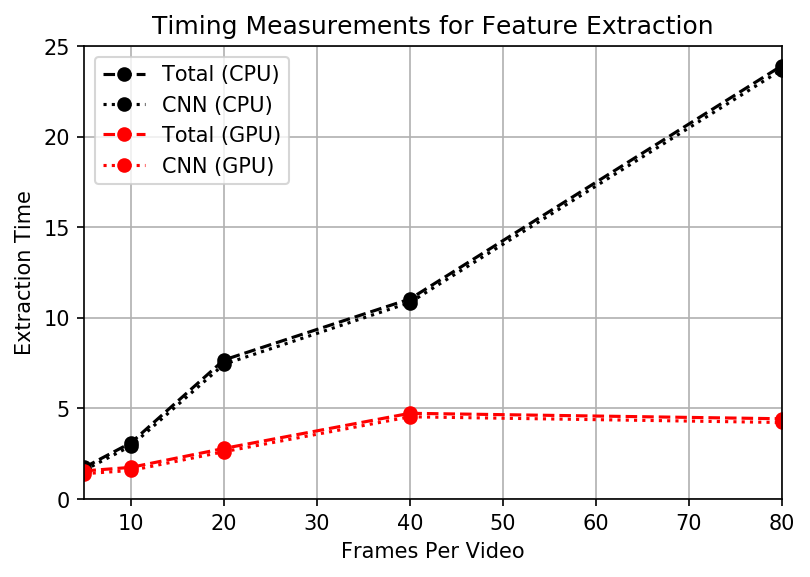

In [7]:
timing = np.load('CPU_timing.npy')
y_CNN = [y['CNN'] for y in timing]
y_total = [y['total'] for y in timing]

timing = np.load('GPU_timing.npy')
y_CNN_GPU = [y['CNN'] for y in timing]
y_total_GPU = [y['total'] for y in timing]

plt.figure(dpi=150)
plt.plot(x,y_total,'--ko')
plt.plot(x,y_CNN,':ko')
plt.plot(x,y_total_GPU,'--ro')
plt.plot(x,y_CNN_GPU,':ro')
plt.xlabel('Frames Per Video')
plt.ylabel('Extraction Time')
plt.xlim([5, 80])
plt.ylim([0,25])
plt.grid('on')
plt.legend([
    'Total (CPU)',
    'CNN (CPU)',
    'Total (GPU)',
    'CNN (GPU)'
])
plt.title('Timing Measurements for Feature Extraction')

#### Average over 100 videos

In [6]:
import glob

In [7]:
video_files = glob.glob('/home/dev/video-classification/UCF-101/ApplyEyeMakeup/*.avi')[0:100]
frame_dir = '/home/dev/temp_frame_dir'

In [8]:
timing = [[]] * len(x)
timing = [timing] * len(video_files)
for i_frames_per_video, frames_per_video in enumerate(x):
    extractor = Extractor(frames_per_video=frames_per_video)
    for i_video_file, video_file in enumerate(video_files):
        sequence, timing[i_video_file][i_frames_per_video] = extractor.extract(video_file, frame_dir)

In [9]:
if CPU:
    np.save(arr=timing, file='CPU_timing_avg')
else:
    np.save(arr=timing, file='GPU_timing_avg')

Text(0.5,1,'Timing Measurements for Feature Extraction')

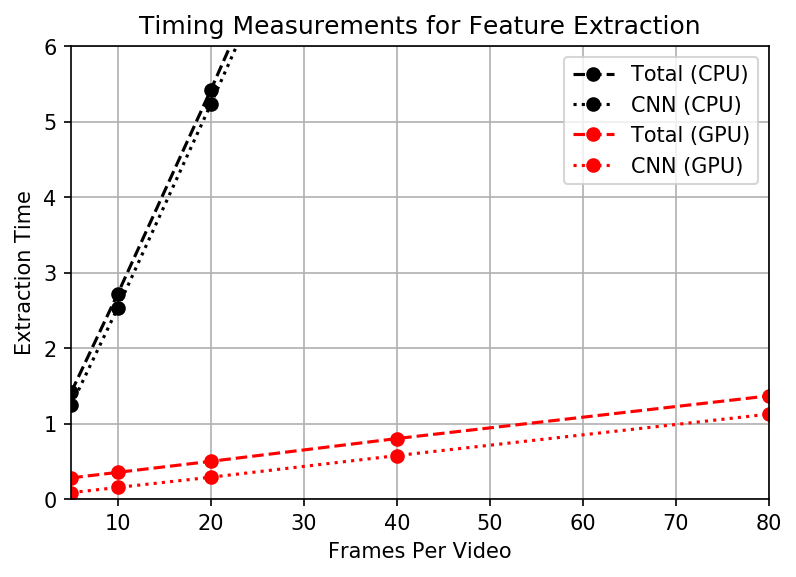

In [10]:
timing = np.load('CPU_timing_avg.npy')
y_CNN = np.zeros([len(video_files), len(x)])
y_total = np.zeros([len(video_files), len(x)])
for i_video_file in range(len(video_files)):
    y_CNN[i_video_file,:] = [y['CNN'] for y in timing[i_video_file]]
    y_total[i_video_file] = [y['total'] for y in timing[i_video_file]]
y_CNN = np.mean(y_CNN,0)
y_total = np.mean(y_total,0)

timing = np.load('GPU_timing_avg.npy')
y_CNN_GPU = np.zeros([len(video_files), len(x)])
y_total_GPU = np.zeros([len(video_files), len(x)])
for i_video_file in range(len(video_files)):
    y_CNN_GPU[i_video_file,:] = [y['CNN'] for y in timing[i_video_file]]
    y_total_GPU[i_video_file,:] = [y['total'] for y in timing[i_video_file]]
y_CNN_GPU = np.mean(y_CNN_GPU,0)
y_total_GPU = np.mean(y_total_GPU,0)

plt.figure(dpi=150)
plt.plot(x,y_total,'--ko')
plt.plot(x,y_CNN,':ko')
plt.plot(x,y_total_GPU,'--ro')
plt.plot(x,y_CNN_GPU,':ro')
plt.xlabel('Frames Per Video')
plt.ylabel('Extraction Time')
plt.xlim([5, 80])
plt.ylim([0,6])
plt.grid('on')
plt.legend([
    'Total (CPU)',
    'CNN (CPU)',
    'Total (GPU)',
    'CNN (GPU)'
])
plt.title('Timing Measurements for Feature Extraction')

In [11]:
print(y_total_GPU)
print(y_total)

[ 0.28110933  0.35406065  0.49998879  0.80161834  1.36709332]
[  1.41865921   2.72077727   5.41903257  10.9956274   20.59949327]
